# Exploratory Data Analysis
## Let us import all important packages and data.

In [74]:
# DATA ANALYSIS.
import numpy as np
import pandas as pd


# DATA VISUALIZATION.
import matplotlib.pyplot as plt
import seaborn as sns


# MODELLING
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier


# DATA VALIDATION AND METRIC.
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import recall_score, roc_auc_score, make_scorer, roc_curve, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest,chi2,f_regression, f_classif
from sklearn.decomposition import PCA
from sklearn.calibration import calibration_curve



# HIDING AND MAGIC COMMANDS
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [75]:
#Master Data Load
data = pd.read_csv('/home/ubuntu/Production/EDA/EDA_Data.csv')

In [76]:
data.head()

,accountsapid,Single_Order,2019,2020,2021,Churn_Rule_year_wise,Churn_Rule_avg_cycle,Median_Days,3_years_cycle,Final_Churn,...,OrderChannel_EProcurement,OrderChannel_ECommerce,Recency,Frequency,Monetary,RFM_Score,CountryCode,Average_years_taken_per order,Orders year wise,Channel_wise
0,17876.0,No,Yes,No,No,Will_Churn,Will_Churn,73.0,219.0,Will_Churn,...,No,No,664.0,3.0,625.00,10,US,3.0,Orders only in 2019,Bought from NonDigital
1,17882.0,No,Yes,Yes,Yes,WillNot_Churn,WillNot_Churn,20.0,60.0,WillNot_Churn,...,No,No,881.0,93.0,41278.00,6,US,1.0,Orders in all years,Bought from NonDigital
2,17985.0,No,Yes,Yes,Yes,WillNot_Churn,WillNot_Churn,174.0,522.0,WillNot_Churn,...,Yes,No,872.0,52.0,11097.00,6,US,1.0,Orders in all years,"Bought from NonDigital,EProcurement"
3,22286.0,No,Yes,Yes,Yes,WillNot_Churn,WillNot_Churn,21.0,63.0,WillNot_Churn,...,No,Yes,893.0,87.0,29191.16,6,CA,1.0,Orders in all years,"Bought from NonDigital,ECommerce"
4,19780.0,No,Yes,Yes,Yes,WillNot_Churn,WillNot_Churn,42.0,126.0,WillNot_Churn,...,No,No,850.0,34.0,22553.85,6,US,1.0,Orders in all years,Bought from NonDigital


# Contents
 Here are the list of things that we are going to explore in this notebook file:
- **1. Univariate Analysis:** Exploring each Feature at a time.
- **2. Bivariate Analysis:** Exploring Multiple Features at a time.

## Univariate Analysis and Bivariate Analysis:
- Analyzing and Exploring each Feature at a time.

In [77]:
# Printing info and details of this dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   accountsapid                   9396 non-null   float64
 1   Single_Order                   9396 non-null   object 
 2   2019                           9396 non-null   object 
 3   2020                           9396 non-null   object 
 4   2021                           9396 non-null   object 
 5   Churn_Rule_year_wise           9396 non-null   object 
 6   Churn_Rule_avg_cycle           9396 non-null   object 
 7   Median_Days                    9396 non-null   float64
 8   3_years_cycle                  9396 non-null   float64
 9   Final_Churn                    9396 non-null   object 
 10  TotalOrderNumber               9396 non-null   float64
 11  FirstOrderedDate               9396 non-null   object 
 12  LastOrderedDate                9396 non-null   o

# Churning or Not.
- This Target feature defines whether a Customer will **Churn** or **Not**. There we will also see the churn percentages through different rules and all combined.


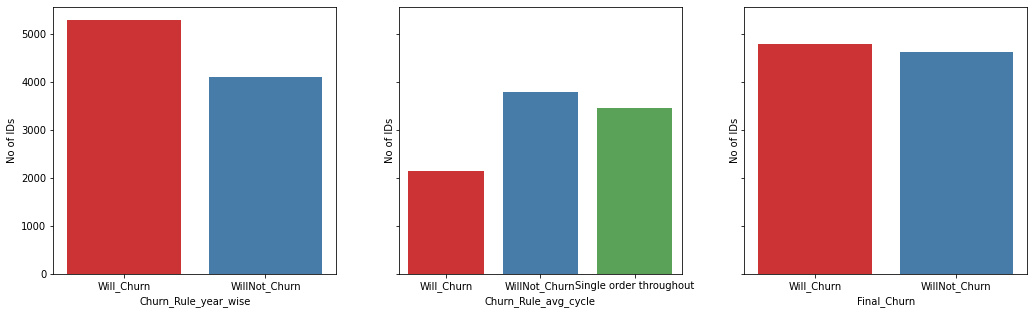

In [78]:
# CREATING SUBPLOTS FOR COUNTPLOTS OF PEOPLE WHO WILL CHURN AND WILLNOT CHURN W.R.T. EACH RULE.

fig, ax =plt.subplots(1,3,figsize=(15, 5), sharey=True)
sns.countplot(data['Churn_Rule_year_wise'], ax=ax[0], palette='Set1');
sns.countplot(data['Churn_Rule_avg_cycle'], ax=ax[1], palette='Set1');
sns.countplot(data['Final_Churn'], ax=ax[2], palette='Set1');
ax[0].set_ylabel('No of IDs')
ax[1].set_ylabel('No of IDs')
ax[2].set_ylabel('No of IDs')
fig.show()
fig.tight_layout(pad=3.0)

***Inference:***
- According to **Churn_Rule_year_wise 56%** of the people **Will Churn**.
- According to **Churn_Rule_avg_cycle 36%** of the people **Will Churn**.
- According to the **Combined Rules** about **51%** of the people **Will Churn**.

### Single_order
- This column has two unique values Yes, No. It indicates whether a user/ customer has a single order or not.

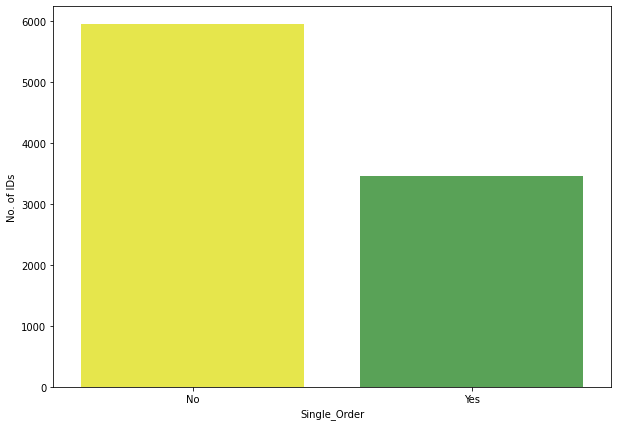

In [79]:
# COUNTPLOT FOR CHURN OR NOT FOR SINGLE ORDER COLUMN.

fig = plt.figure(figsize=(10,7))
sns.countplot(data['Single_Order'], palette='Set1_r');
plt.ylabel('No. of IDs');

- About **37%** of the people **have Single orders** throughout their Active Days with the Company.

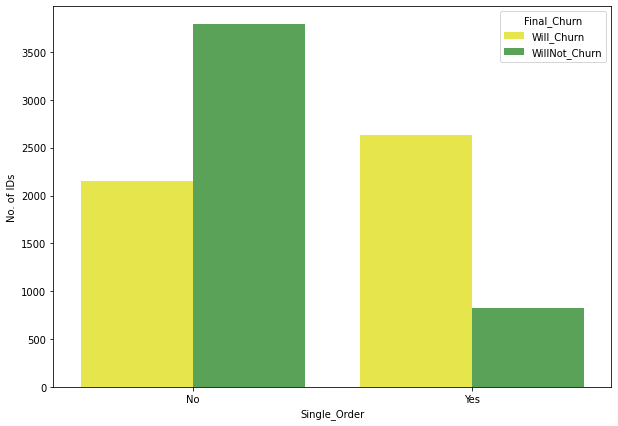

In [80]:
fig = plt.figure(figsize=(10,7))
sns.countplot(x='Single_Order', hue='Final_Churn',data=data, palette='Set1_r');
plt.ylabel('No. of IDs');

### Year Wise Ordered or Not (2019, 2020, 2021)
- This below plot Explains whether a User has an order in that particular year or not.

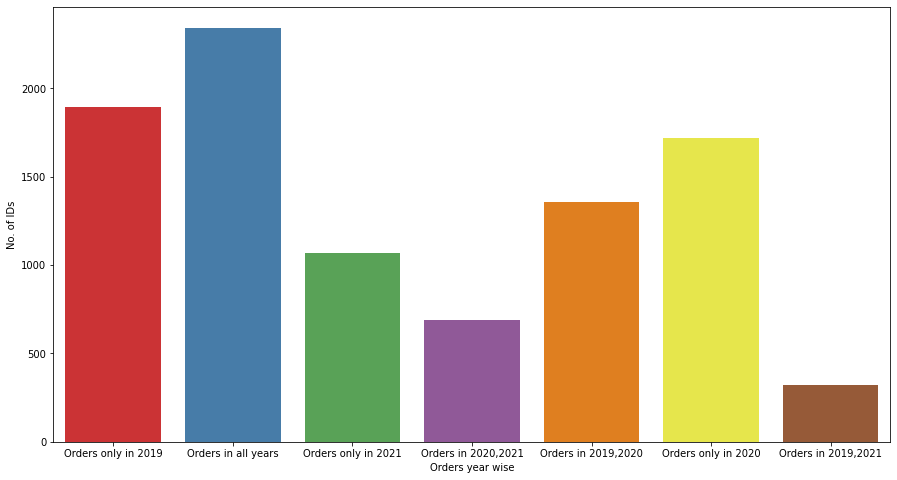

In [81]:
# This Piece of code makes plots of the People proportions from each year and combined.
fig = plt.figure(figsize=(15,8))
sns.countplot(data['Orders year wise'], palette='Set1');
plt.ylabel('No. of IDs');

***Inferences:***
   - About **25%** people have orders in all **2019, 2020, 2021 (1,1,1) years**.
   - About **20%** people have orders only in **2019 (1,0,0) year**.
   - About **18%** people have orders only in **2020 (0,1,0) year**.
   - About **11%** people have orders only in **2021 (0,0,1) year**.
   - About **14%** people have orders in both **2019, 2020 (1,1,0) year**.
   - About **7%** people have orders in both **2020, 2021 (0,1,1) year**.
   - About **3%** people have orders in both **2019, 2021 (1,0,1) year**.
   
- Now let us see the proportions of the people who are Churning and who are not.

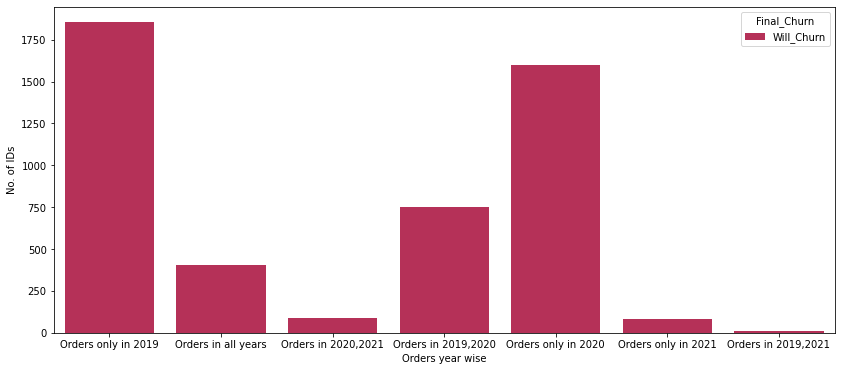

In [82]:
#
fig = plt.figure(figsize=(14,6))
sns.countplot(x='Orders year wise', hue='Final_Churn', data=data[data['Final_Churn']=='Will_Churn'],palette='rocket');
plt.ylabel('No. of IDs');

***Inferences:***
   - About **98%** people will **Churn** who made transactions only in **year 2019 (1,0,0)**.
   - About **93%** people will **Churn** who made transactions only in **year 2020 (0,1,0)**.
   - About **55%** people will **Churn** who made transactions in **years 2019, 2020 (1,1,0)**.
   - About **93%** people **Will Not Churn** who made transactions only in **year 2021 (0,0,1)**.
   - About **84%** people **Will Not Churn** who made transactions in **years 2020, 2021 (0,1,1)**.

## Median Days
- This features has all the Average number of days spent by a user/ customer in between the Orders.
- Let us visualize them.

Average number of Days spent by a User or Customer 21.0


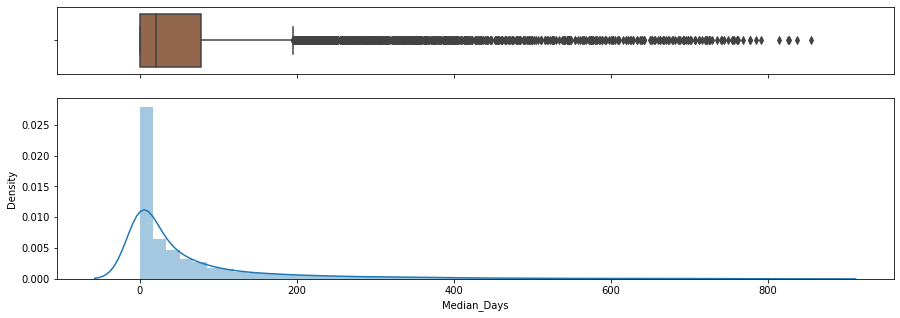

In [83]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,figsize=(15, 5), gridspec_kw={"height_ratios": (.35, .95)});
median_days_value = data['Median_Days'].median()
print(f'Average number of Days spent by a User or Customer {median_days_value}')
sns.boxplot(data['Median_Days'], ax=ax_box, palette='copper');
sns.distplot(data['Median_Days'], ax=ax_hist);

ax_box.set(xlabel='');

**Inferences:**
   - Looks like the **Average number** of days spend by a user were around **21 days**.
   - More than **30%** people have **Average number** of days more than **50 Days**.
   - Less than **10%** people have **Average number** of days more than **200 Days**.
   
- Let us have a look at the distribution of the Median days for people churning and not churning.

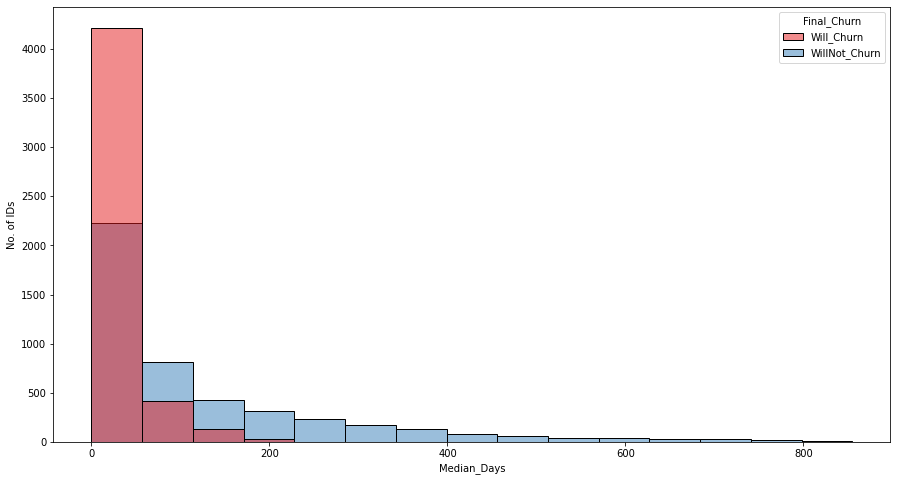

In [84]:
fig = plt.figure(figsize=(15,8))
sns.histplot(x='Median_Days', data=data, hue='Final_Churn', bins=15, palette='Set1');
plt.ylabel('No. of IDs');

***Inferences:*** 

   - People having Average number of days lesser than **200 Days** will always tend to leave the company or **Churn**.
   - **85%** of the people who **WillNot Churn** have median days **less than 250 Days**.
   - **25%** of the people who **Will Churn** have median days **greater than 50 Days**.

## Average years spent per order
- This feature explains the amount of average years spent in between the orders made by a user/ customer.

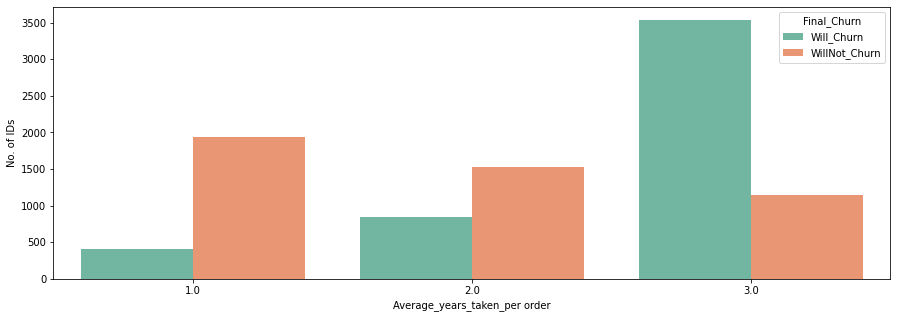

In [85]:
fig=plt.figure(figsize=(15, 5))
sns.countplot(x='Average_years_taken_per order', hue='Final_Churn', data=data, palette='Set2');
plt.ylabel('No. of IDs');

***Inferences:***
   - The **Lesser** the **Average amount of years** spent between the order the **greater** would be the chance of **customer not leaving** the company.
   - The **Greater** the **Average amount of years** spent in between the **lesser** would be the chance of **customer not churning** or not leaving the company.

## Orders through Different Channels(NonDigital, EProcurement, ECommerce)
- This will be a deep dive throught the orders that have been made via different channels like NonDigital, EProcurement, ECommerce. We will try to analyze their proportions.

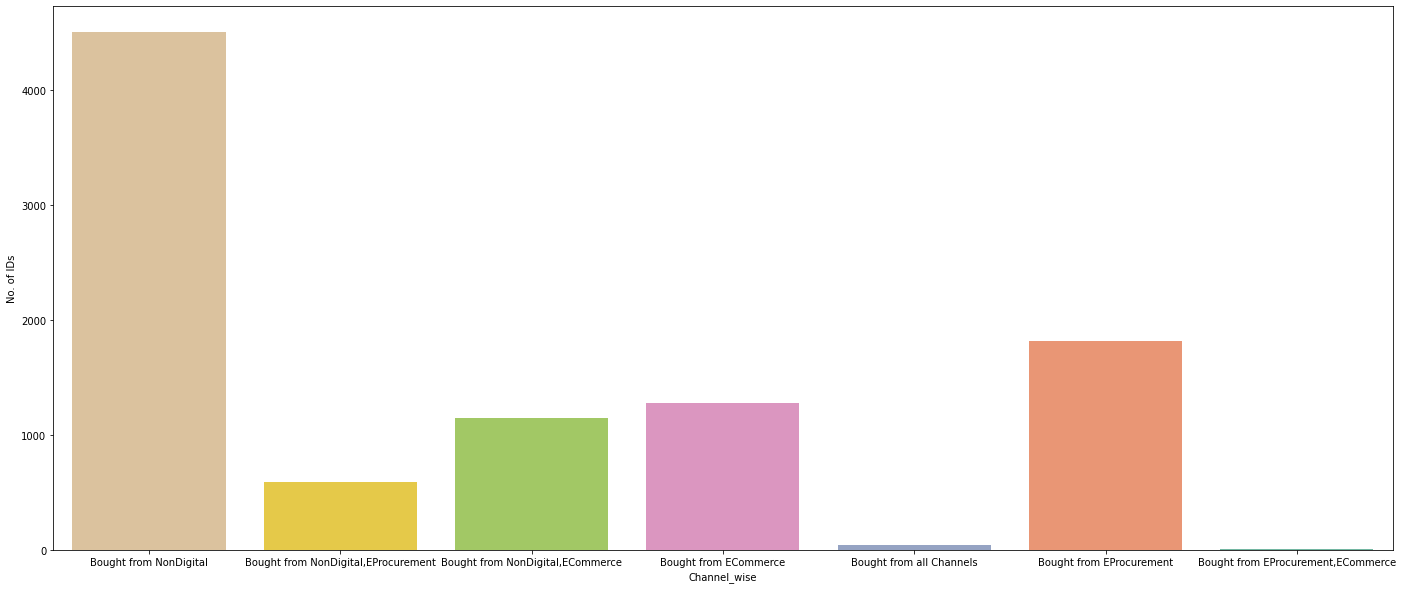

In [86]:
# This Piece of code makes plots of the People proportions from each year and combined.
fig = plt.figure(figsize=(24,10))
sns.countplot(data['Channel_wise'], palette='Set2_r');
plt.ylabel('No. of IDs');

***Inferences:***
   - About **48%** of the people made transactions through only **NonDigital** channel.
   - About **19%** of the people made transactions through only **EProcurement** channel.
   - About **14%** of the people made transactions through only **ECommerce** channel.
   - About **12%** of the people made transactions through **NonDigital, ECommerce** channels.
   - Less than **1%** of the people made transactions through **All channels**.
 
- *Let us see the Churn percentage of the customers via each Channels.*

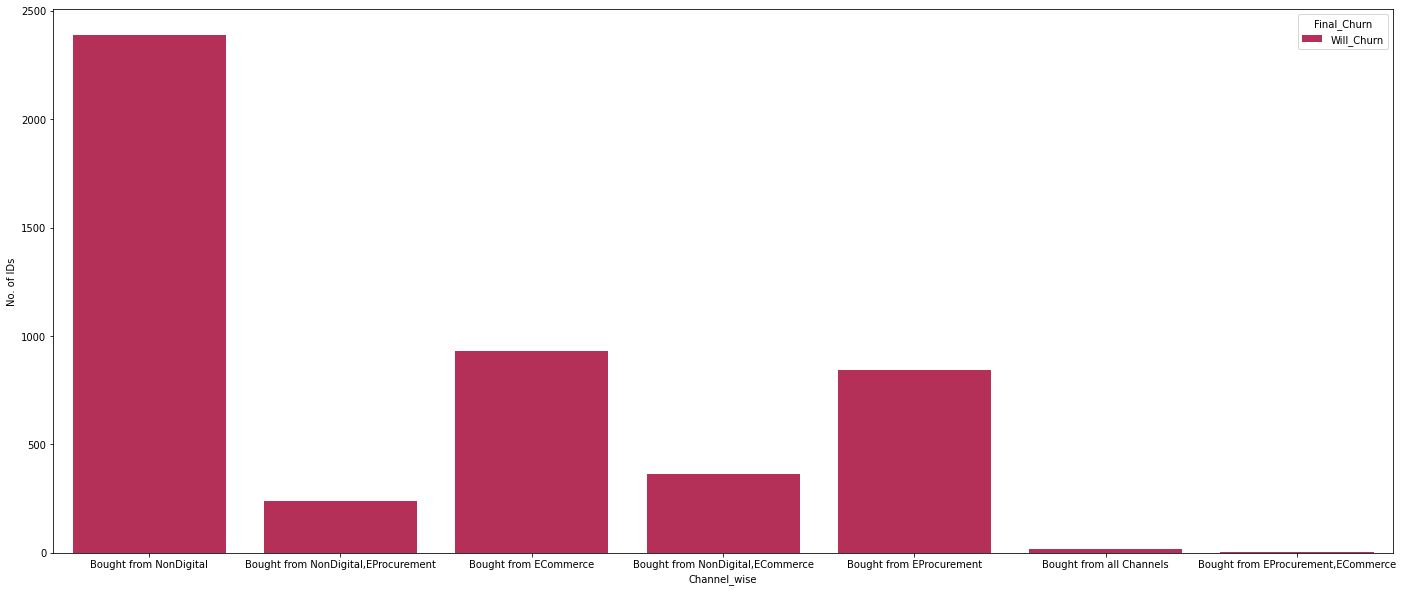

In [87]:
fig = plt.figure(figsize=(24,10))
sns.countplot(x='Channel_wise', hue='Final_Churn', data=data[data['Final_Churn']=='Will_Churn'],palette='rocket_r');
plt.ylabel('No. of IDs');

***Inferences:***
   - **53%** People who have ordered from the **NonDigital** Channel **Will Churn**.
   - **73%** People who have ordered from the **ECommerce** Channel **Will Churn**.
   - **45%** People who have ordered from the **EProcurement** Channel **Will Churn**.
   - **41%** People who have ordered from the **NonDigital, EProcurement** Channel **Will Churn**.
   - **32%** People who have ordered from the **NonDigital, ECommerce** Channel **Will Churn**.
   
   
- **This Simply shows us that people who have made transactions from Non-Digital tend to Leave(Churn) and EProcurement is a more profitable place to order from than other two channels. People who order from both NonDigital, ECommerce Channels simultaneously tend to stay long with the Company(WillNot Churn)**

## Frequency, Monetary
- **Frequency:** How often has a customer transacted or interacted with the brand during a particular period of time.
- **monetary :** Also referred to as “monetary value,” this factor reflects how much a customer has spent with the brand during a particular period of time.

### Frequency

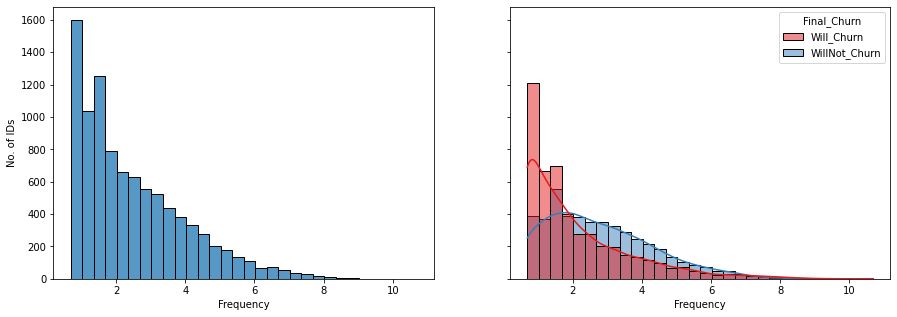

In [88]:
# Applying Log transfromation to Widen the Distribution of the data.
fig, ax =plt.subplots(1,2,figsize=(15, 5), sharey=True)
sns.histplot(x=np.log(data['Frequency']+1), data=data, ax=ax[0], palette='crest',bins=30);
sns.histplot(x=np.log(data['Frequency']+1), hue='Final_Churn', data=data, ax=ax[1], palette='Set1', bins=30, kde=True);
ax[0].set_ylabel('No. of IDs');
ax[1].set_ylabel('No. of IDs');

***Inference:***
   - **Median Frequency** for people who are **Churning is 4 transactions** where as people who are **not churning has Median Frequency of 12 transactions**.
   - **Greater the frequency of people greater will be the probability of Customer not churning.**

### Monetary

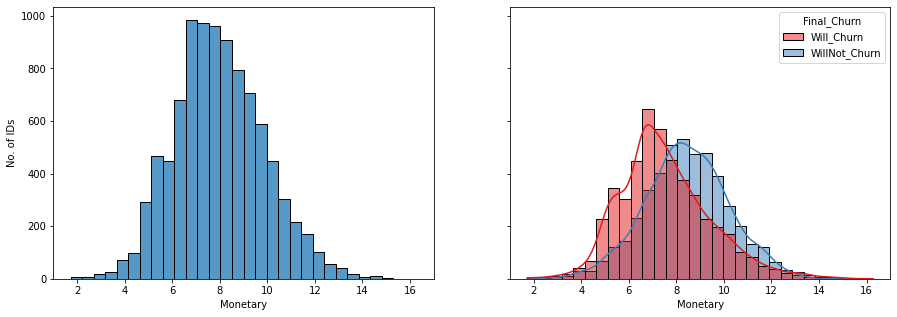

In [89]:
# Applying Log transfromation to Widen the Distribution of the data.
fig, ax =plt.subplots(1,2,figsize=(15, 5), sharey=True)
sns.histplot(np.log(data['Monetary']+1), ax=ax[0], palette='crest',bins=30);
sns.histplot(x=np.log(data['Monetary']+1), hue='Final_Churn', data=data, ax=ax[1], palette='Set1', bins=30, kde=True);
ax[0].set_ylabel('No. of IDs');
ax[1].set_ylabel('No. of IDs');

***Inference:***
   - **Average Amount** spend by the Customers who **Will Churn** is about **1485 Dollars**.
   - **Average Amount** spend by the Customers who **Will Not Churn** is about **4495 Dollars**.
   - This Means that greater the Amount spend by the Customer greater will be the probability of him not Churning.

## RFM Score


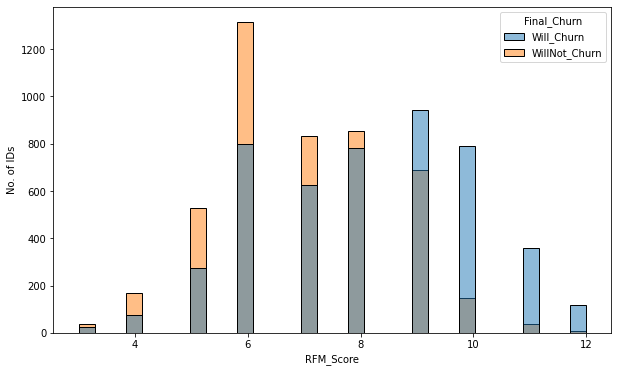

In [90]:
fig = plt.figure(figsize=(10,6))
sns.histplot(x='RFM_Score', data=data, hue='Final_Churn');
plt.ylabel('No. of IDs');

***Inferences:***
   - Greater the RFM Score greater will be the chance of Customer not churning.
   - High RFM Score is a healthy sign for Customer not leaving the Company

## Country Code
- This feature tells us from which place the order was made. We have 3 Unique values in it and they are: **{US, CA, PR}.** Let us explore more about the proportions of people belonging from and also the percentage of the people Churning out.

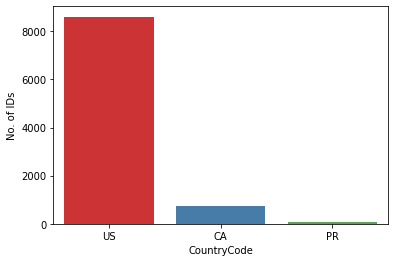

In [91]:
sns.countplot(data['CountryCode'], palette='Set1');
plt.ylabel('No. of IDs');

***Inferences:***
   - This chart clearly explains that majority of the people belong to **US Country Code Region** with about **91.5%** followed by **CA Country Code Region** with **7.7%** proportion of people.
   - Very few people belong to **PR Country Code Region** about **less than 1% (<1%)**.
   
- Let us take a look at the proportions of the people who are churning out from different places.

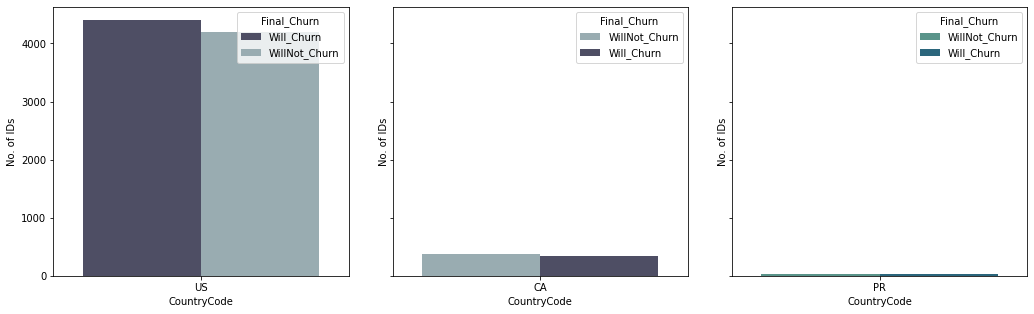

In [92]:
fig, ax =plt.subplots(1,3,figsize=(15, 5), sharey=True)
sns.countplot(x='CountryCode', hue='Final_Churn', data=data[data['CountryCode']=='US'], ax=ax[0], palette='bone');
sns.countplot(x='CountryCode', hue='Final_Churn', data=data[data['CountryCode']=='CA'], ax=ax[1], palette='bone_r');
sns.countplot(x='CountryCode', hue='Final_Churn', data=data[data['CountryCode']=='PR'], ax=ax[2], palette='crest');
ax[0].set_ylabel('No. of IDs');
ax[1].set_ylabel('No. of IDs');
ax[2].set_ylabel('No. of IDs');
fig.show()
fig.tight_layout(pad=3.0)

***Inferences:***
- Almost **50%** of the people are **Churning** from **all the places**.
- **This simply means that the area at which the customers are living has to do nothing with their Churn.**

# Data Preprocessing
## Utility Functions
- These are some functions that we have used to transform a particular variable(Feature).

In [93]:
## Handling dates
def handle_dates(dataframe_in, date_column, date_format):
    
    '''
    Description: Converts a Date Column to a Standard Pandas Date Format.

    Aurguments:
    dataframe_in = Dataframe.
    date_column = Name of the Date Column.
    date_format = Format of a date Ex:  
    todays_date = tuple containing year, month, day in order
    '''
    dataframe = dataframe_in.copy()
    dataframe[date_column] = pd.to_datetime(dataframe[date_column], format=date_format)
    dataframe[date_column+'_Year'] = dataframe[date_column].dt.year
    dataframe[date_column+'_Month'] = dataframe[date_column].dt.month
    dataframe[date_column+'_Week'] = dataframe[date_column].dt.week
    dataframe[date_column+'_Day'] = dataframe[date_column].dt.day
    dataframe[date_column+'_Dayofweek'] = dataframe[date_column].dt.dayofweek
    #today_date = pd.to_datetime(dt.date(todays_date[0],todays_date[1],todays_date[2]))
    #dataframe[date_column+'_Recency'] = dataframe[date_column].apply(lambda x : (today_date - x).days)
    return dataframe

def All_Label_Encoder(dataframe, how):
    
    
    '''
    Description : This is a Label Encoding Custom Function which makes changes into the dataframe directly.

    Arguments:
    dataframe = Dataframe to be encoded.
    how = A string which indicates the method of encoding , {'numerical', 'probability'}
    '''
    def Label_mapper(name,df,how):

        if how=='numerical':
            sam_dict={}
            num=0
            for loc in sorted(df[name].unique()):
                sam_dict.update([(loc,num)])
                num=num+1
            print(sam_dict)
            df[name]=df[name].map(sam_dict)

        elif how=='probability':
            unique_names=[]
            for ind in df[name].value_counts().index:
                unique_names.append(ind)
            unique_values=[]
            for val in df[name].value_counts():
                unique_values.append(val)
            total_sum=sum(unique_values)
            new_unique_values = []
            for vals in unique_values:
                new_unique_values.append(vals/total_sum)
            proba_dict = {unique_names[i]: new_unique_values[i] for i in range(len(unique_names))}
            df[name]=df[name].map(proba_dict)

    for columns in dataframe.select_dtypes(include=['object']).columns:
        print(columns)
        Label_mapper(columns,dataframe,how)
        
def select_features(X_train, y_train):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    kbestcols = fs.get_support(indices=True)
    imp_features = X_train.iloc[:,kbestcols].columns
    feat_dict = {}
    for i in range(len(kbestcols)):
        feat_dict[kbestcols[i]]=imp_features[i]
    f_stat_score = {}
    for i in range(len(fs.scores_)):
        f_stat_score[i]=fs.scores_[i]
    df = pd.DataFrame({'Feat_name':f_stat_score.keys(), 'Importance/ f-statistic':f_stat_score.values()})
    df['Feat_name']=df['Feat_name'].map(feat_dict)
        
    return df

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

- **HANDLING DATES AND CATEGORICAL COLUMNS:**

In [94]:
# This piece of code handles dates.
new_data=handle_dates(data, 'FirstOrderedDate', '%Y-%m-%d')
data=handle_dates(new_data, 'LastOrderedDate', '%Y-%m-%d')
data.drop(['FirstOrderedDate','LastOrderedDate'], axis=1, inplace=True)

In [95]:
# We pass in data to do label encoding
All_Label_Encoder(data, 'numerical')

Single_Order
{'No': 0, 'Yes': 1}
2019
{'No': 0, 'Yes': 1}
2020
{'No': 0, 'Yes': 1}
2021
{'No': 0, 'Yes': 1}
Churn_Rule_year_wise
{'WillNot_Churn': 0, 'Will_Churn': 1}
Churn_Rule_avg_cycle
{'Single order throughout': 0, 'WillNot_Churn': 1, 'Will_Churn': 2}
Final_Churn
{'WillNot_Churn': 0, 'Will_Churn': 1}
OrderChannel_NonDigital
{'No': 0, 'Yes': 1}
OrderChannel_EProcurement
{'No': 0, 'Yes': 1}
OrderChannel_ECommerce
{'No': 0, 'Yes': 1}
CountryCode
{'CA': 0, 'PR': 1, 'US': 2}
Orders year wise
{'Orders in 2019,2020': 0, 'Orders in 2019,2021': 1, 'Orders in 2020,2021': 2, 'Orders in all years': 3, 'Orders only in 2019': 4, 'Orders only in 2020': 5, 'Orders only in 2021': 6}
Channel_wise
{'Bought from ECommerce': 0, 'Bought from EProcurement': 1, 'Bought from EProcurement,ECommerce': 2, 'Bought from NonDigital': 3, 'Bought from NonDigital,ECommerce': 4, 'Bought from NonDigital,EProcurement': 5, 'Bought from all Channels': 6}


- Let us check for our transformed data and its info.

In [96]:
data.head()

,accountsapid,Single_Order,2019,2020,2021,Churn_Rule_year_wise,Churn_Rule_avg_cycle,Median_Days,3_years_cycle,Final_Churn,...,FirstOrderedDate_Year,FirstOrderedDate_Month,FirstOrderedDate_Week,FirstOrderedDate_Day,FirstOrderedDate_Dayofweek,LastOrderedDate_Year,LastOrderedDate_Month,LastOrderedDate_Week,LastOrderedDate_Day,LastOrderedDate_Dayofweek
0,17876.0,0,1,0,0,1,2,73.0,219.0,1,...,2019,9,36,3,1,2019,11,46,15,4
1,17882.0,0,1,1,1,0,1,20.0,60.0,0,...,2019,1,5,29,1,2021,6,22,4,4
2,17985.0,0,1,1,1,0,1,174.0,522.0,0,...,2019,2,6,7,3,2021,6,24,18,4
3,22286.0,0,1,1,1,0,1,21.0,63.0,0,...,2019,1,3,17,3,2021,5,20,20,3
4,19780.0,0,1,1,1,0,1,42.0,126.0,0,...,2019,3,9,1,4,2021,3,13,31,2


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   accountsapid                   9396 non-null   float64
 1   Single_Order                   9396 non-null   int64  
 2   2019                           9396 non-null   int64  
 3   2020                           9396 non-null   int64  
 4   2021                           9396 non-null   int64  
 5   Churn_Rule_year_wise           9396 non-null   int64  
 6   Churn_Rule_avg_cycle           9396 non-null   int64  
 7   Median_Days                    9396 non-null   float64
 8   3_years_cycle                  9396 non-null   float64
 9   Final_Churn                    9396 non-null   int64  
 10  TotalOrderNumber               9396 non-null   float64
 11  NumQtrsPerOrder                9396 non-null   float64
 12  OrderChannel_NonDigital        9396 non-null   i

# Feature importances
- We will be using a Statistical Feature selection Method like KBest.
### What is KBest?
- Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable.
- The SelectKBest class just scores the features using a function (in this case f_classif but could be others) and then "removes all but the k highest scoring features".
- So its kind of a wrapper, the important thing here is the function you use to score the features.
- We will be using **f-Classif** as our Function to calculate the dependencies.
- **F-Classif:**
    - Used only for categorical targets.
    - It Assumes the Data to be normal where we can assume it from **Central-Limit theorem**.
    - Based on the Analysis of Variance (ANOVA) statistical test.
    - We will be applying ANOVA test between the Independent featues and the categorical target variable.
    - It will be between an Independent variable and Target variable.


In [98]:
best_feature_df = select_features(data.drop(['Final_Churn','accountsapid'], axis=1), data['Final_Churn']).sort_values('Importance/ f-statistic', ascending= False)
best_feature_df

,Feat_name,Importance/ f-statistic
3,2021,9647.831235
26,LastOrderedDate_Year,9183.270222
4,Churn_Rule_year_wise,6866.584826
18,Average_years_taken_per order,3106.819513
9,NumQtrsPerOrder,2818.457511
7,3_years_cycle,2024.880859
6,Median_Days,2024.880859
0,Single_Order,1644.026733
16,RFM_Score,1058.651851
28,LastOrderedDate_Week,660.145329


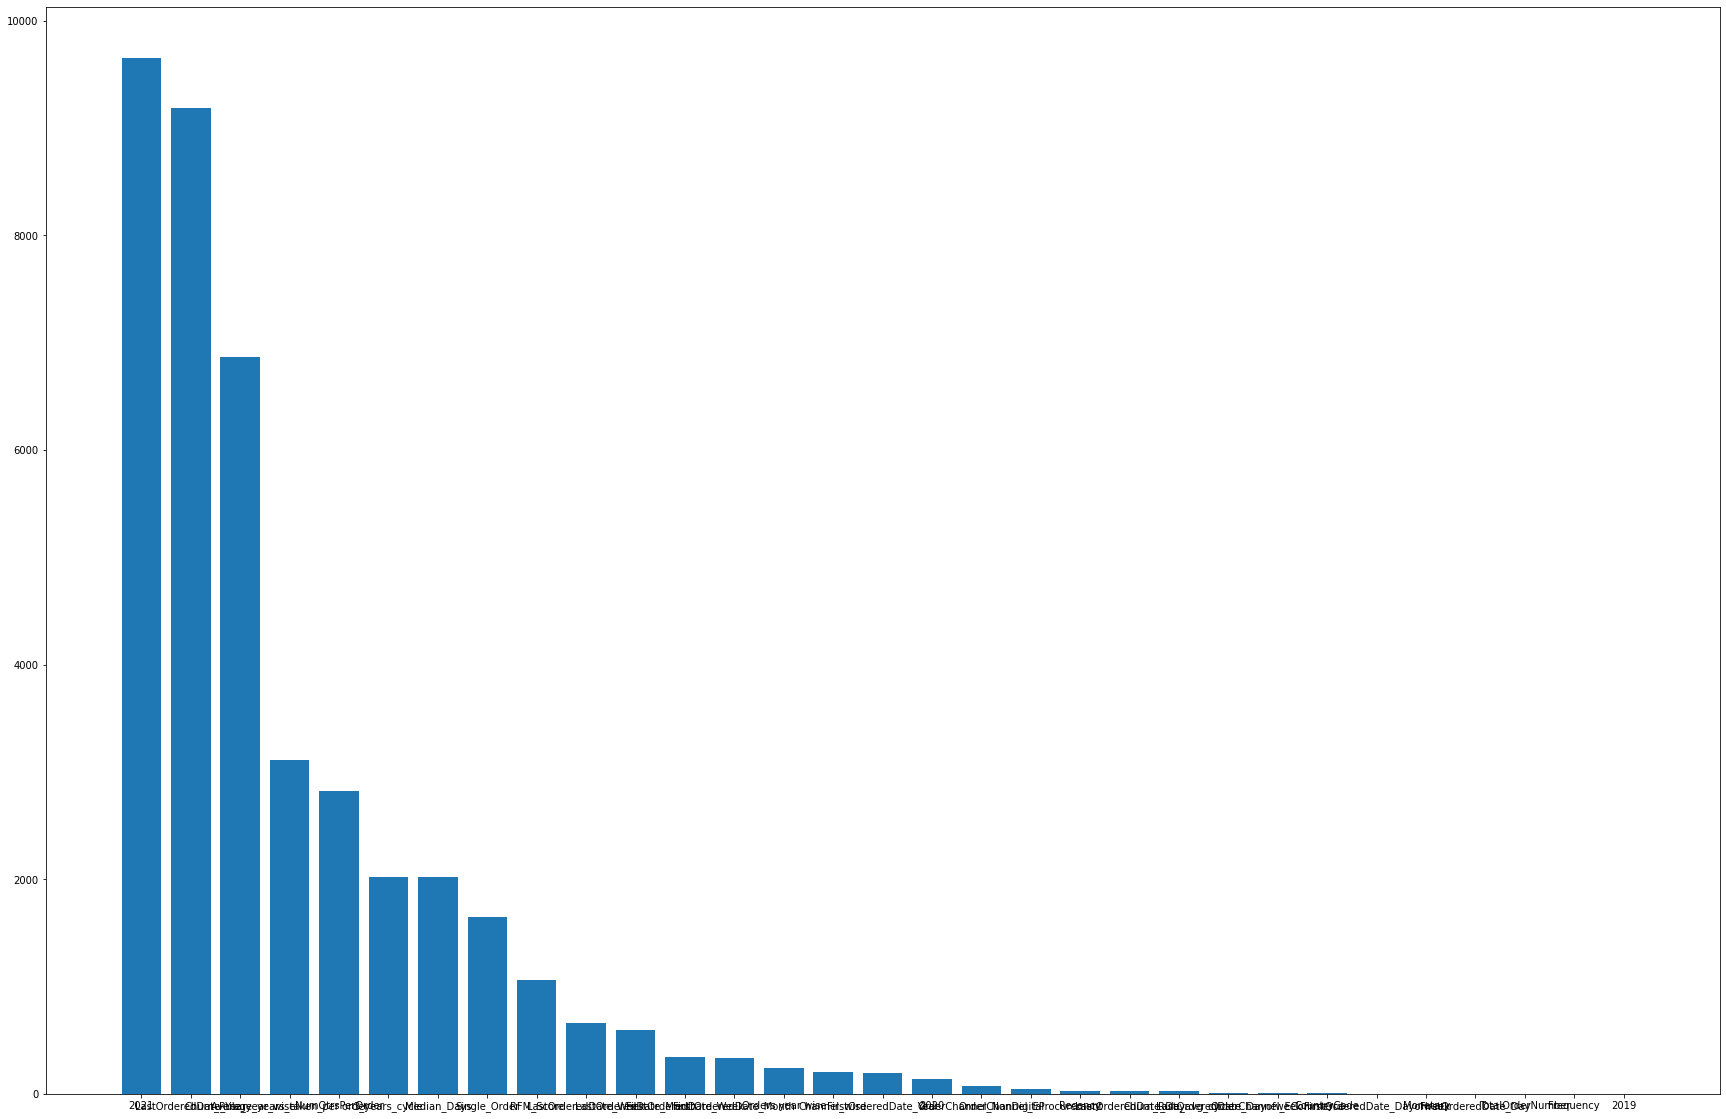

In [99]:
fig = plt.figure(figsize=(30,20))
plt.bar(best_feature_df['Feat_name'], best_feature_df['Importance/ f-statistic'])
plt.show()

- **NOTE:** We aren't looking for any P-value here just looking at the f-statsitic as it itself can be used as a **signal**. It can be analyzed as Signal to Noise ratio, lesser the noise greater will be the signal and greater will be f-statistic

# Dimensional Reduction to Visualise classes(PCA)
- As we have around 32 variable its almost impossible to have a pairplot and visualize the class boundaries.

In [100]:
predictors = data.drop(['Final_Churn','accountsapid'], axis=1)
target = data['Final_Churn']

- Reducing them into **2 Dimensions by using PCA.**

In [101]:
pca = PCA(2)
pca.fit(predictors)
pca_data = pca.transform(predictors)
var_cov = pca.explained_variance_ratio_.sum()
print(f'About {round(var_cov*100)} of the variance have been covered within 2 Principal components')
pca_df = pd.DataFrame(data=pca_data, columns=['pca1','pca2'])
pca_df['Target']= target

About 100 of the variance have been covered within 2 Principal components


- visualizing the results using Pairplot and a single Scatter plot.

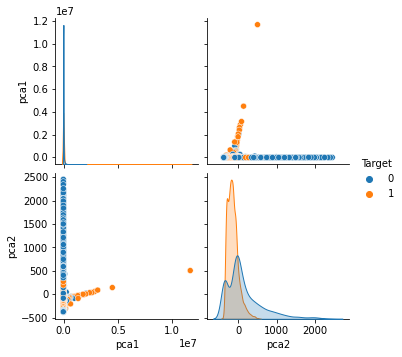

In [102]:
sns.pairplot(pca_df, hue='Target');

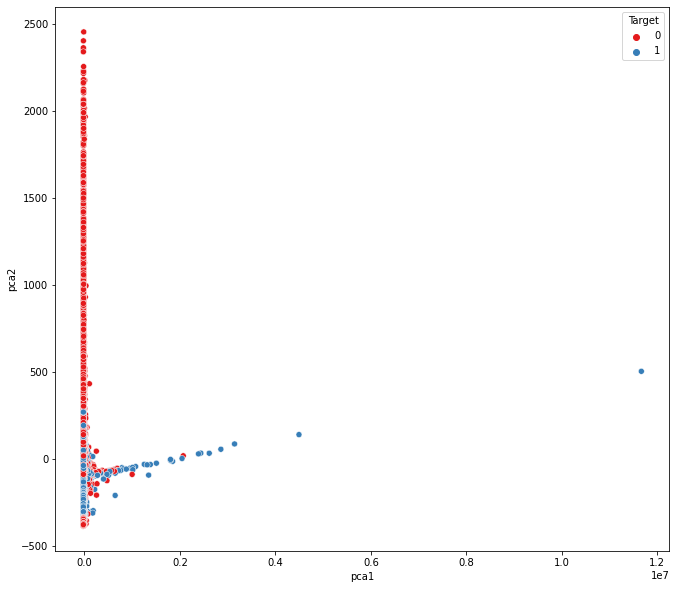

In [103]:
fig = plt.figure(figsize=(11,10))
sns.scatterplot(x='pca1',y='pca2',data=pca_df, hue='Target', palette='Set1');

**Conclusion:**
- We can see that they are easily separable by a linear boundaries.


# Building a BaseLine Logistic Regression model

- Using a **5-Fold Cross validation** Strategy to look up to the score.
- As we need to reduce **False Negatives** here we would be reducing **Recall as a Metric.**

In [109]:
# This piece of code builds a k-fold score
cross_val_score(LogisticRegression(), predictors, target).mean()

0.7755481073001709

- Let us try to use best features from the **Feature Selection** part.
- We will be using top 10 Features for our models.

In [105]:
top_10_features = list(best_feature_df.head(10)['Feat_name'])

In [110]:
# This piece of code builds a k-fold score
cross_val_score(LogisticRegression(), predictors[top_10_features], target).mean()

0.9236932841144565

- Thats looks like an Improvement... **Previously by using all 30 features gave us 83% recall and by using top 10 features we get 88.5% Recall.**
- Like this we can keep on adding features recursively and tune the Model for best parameters.

# Visualizing Model Boundaries 
- Selecting top features and then Meshing the features to one grid and visualizing the Model Boundaries.

- **This is the Model boundary for all 30 features.**

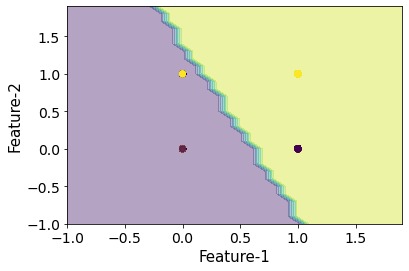

In [107]:
plt.figure
plot_decision_boundaries(predictors, target, LogisticRegression);

- **This Model is been built on top of Top 10 Features that are:**
**['2021',
 'LastOrderedDate_Year',
 'Churn_Rule_year_wise',
 'Average_years_taken_per order',
 'NumQtrsPerOrder',
 '3_years_cycle',
 'Median_Days',
 'Single_Order',
 'RFM_Score',
 'LastOrderedDate_Week']**

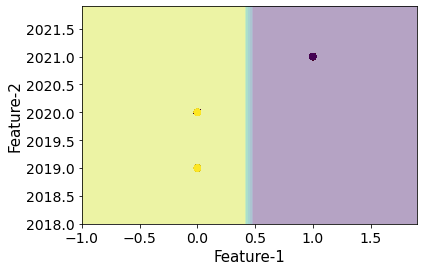

In [108]:
plt.figure
plot_decision_boundaries(predictors[top_10_features], target, LogisticRegression);